![](img/Slide_01.svg)

![](img/Slide_02.svg)

![](img/Slide_03.svg)

![](img/Slide_04.svg)

![](img/Slide_05.svg)

### Series and Dataframes

In [1]:
python_list = [1, 2, 3, 4]

python_list[2]

3

In [2]:
python_list[1:-1]

[2, 3]

In [3]:
python_dict = {'a': 1, 'b': 2, 'c': 3, 'd': 4}

python_dict['c']

3

#### Series: one dimensional labeled array

In [4]:
import pandas

In [5]:
serie = pandas.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
serie

a    1
b    2
c    3
d    4
dtype: int64

In [6]:
serie[1:-1]

b    2
c    3
dtype: int64

In [7]:
serie['c']

3

In [8]:
serie = serie + 1
serie

a    2
b    3
c    4
d    5
dtype: int64

In [9]:
serie + pandas.Series([100, 100, 200, 200], index=['c', 'd', 'a', 'b'])

a    202
b    203
c    104
d    105
dtype: int64

In [10]:
serie = pandas.Series([10, 30, 45, 110], index=['a', 'b', 'c', 'd'])
serie

a     10
b     30
c     45
d    110
dtype: int64

In [11]:
serie.count()

4

In [12]:
serie.mean()

48.75

In [13]:
serie.median()

37.5

In [14]:
serie.std()

43.27720724199595

In [15]:
serie

a     10
b     30
c     45
d    110
dtype: int64

In [16]:
serie.values

array([ 10,  30,  45, 110])

In [17]:
type(serie.values)

numpy.ndarray

#### Dataframe: two dimensional labeled data structure with columns of potentially different types

In [18]:
df = pandas.DataFrame({'name': ['John', 'Peter', 'David', 'Michael'],
                       'id': serie,
                       'birthdate': ['2010-01-02', float('NaN'),
                                     '2011-05-23', 0.]})
df

,name,id,birthdate
a,John,10,2010-01-02
b,Peter,30,NaN
c,David,45,2011-05-23
d,Michael,110,0


In [19]:
df.shape

(4, 3)

### Indexing

#### By position

In [20]:
df.iloc[2]

name              David
id                   45
birthdate    2011-05-23
Name: c, dtype: object

In [21]:
df.iloc[2]['name']

'David'

#### By label

In [22]:
df

,name,id,birthdate
a,John,10,2010-01-02
b,Peter,30,NaN
c,David,45,2011-05-23
d,Michael,110,0


In [23]:
df.loc['b']

name         Peter
id              30
birthdate      NaN
Name: b, dtype: object

#### Boolean indexing

In [24]:
df

,name,id,birthdate
a,John,10,2010-01-02
b,Peter,30,NaN
c,David,45,2011-05-23
d,Michael,110,0


In [25]:
df[df['name'] == 'Michael']

,name,id,birthdate
d,Michael,110,0


In [26]:
df.query('id > 20 and id < 100')

,name,id,birthdate
b,Peter,30,NaN
c,David,45,2011-05-23


![](img/Slide_06.svg)

![](img/Slide_07.svg)

Example: 

### *Housing global price indices*. 


- Dataset comes from [Bank For International Settlements BIS](http://www.bis.org/statistics/pp.htm).

In [27]:
df = pandas.read_csv('data/housing_global_price_indices.csv.gz',
                     parse_dates=['date'])

In [28]:
df.iloc[0]['date']

Timestamp('1966-03-31 00:00:00')

![](img/Slide_08.svg)

#### Now we go back to the dataset example...

In [29]:
df.shape

(12627, 3)

In [30]:
df.sample(5, random_state=45)

,date,country,price_index
5460,1988-06-30,Italy,NaN
9763,2006-03-31,Austria,92.37
2077,1974-09-30,Austria,NaN
12580,2017-09-30,Czech Republic,NaN
9814,2006-03-31,Slovenia,NaN


In [31]:
df[df['price_index'].isnull()].head()

,date,country,price_index
0,1966-03-31,Emerging market economies,NaN
1,1966-03-31,Advanced economies,NaN
2,1966-03-31,United Arab Emirates,NaN
3,1966-03-31,Austria,NaN
4,1966-03-31,Australia,NaN


In [32]:
df['price_index'].isnull().value_counts(normalize=True)

True     0.63879
False    0.36121
Name: price_index, dtype: float64

In [33]:
df_clean = df.dropna()
df_clean.shape

(4561, 3)

In [34]:
df_clean = df.fillna(0)
df_clean.head()

,date,country,price_index
0,1966-03-31,Emerging market economies,0.0
1,1966-03-31,Advanced economies,0.0
2,1966-03-31,United Arab Emirates,0.0
3,1966-03-31,Austria,0.0
4,1966-03-31,Australia,0.0


#### Other ideas:

- Fill missing values using the mean, median, mode by year for each country.

- Linear regression model.

### Typical operations

In [35]:
df = df.dropna().reset_index(drop=True)
df.describe()

,price_index
count,4561.000000
mean,90.835694
std,26.251676
min,21.870000
25%,76.350000
50%,94.700000
75%,103.520000
max,218.090000


In [36]:
df['country'].value_counts()[:5]

South Africa      207
United Kingdom    197
Switzerland       191
Canada            190
United States     167
Name: country, dtype: int64

In [37]:
df.sample(5)

,date,country,price_index
4187,2015-12-31,Turkey,132.58
1800,2005-09-30,Austria,89.71
2416,2008-09-30,Mexico,100.76
4222,2016-03-31,Italy,79.60
640,1991-09-30,Korea,146.74


In [38]:
top_10_price_index = df.sort_values('price_index', ascending=False)[:10]
top_10_price_index

,date,country,price_index
2194,2007-09-30,Latvia,218.09
2145,2007-06-30,Latvia,207.88
2298,2008-03-31,Latvia,207.87
2096,2007-03-31,Latvia,207.37
2245,2007-12-31,Latvia,204.38
2129,2007-06-30,Estonia,198.30
2355,2008-06-30,Latvia,196.51
2080,2007-03-31,Estonia,189.96
2178,2007-09-30,Estonia,188.64
2048,2006-12-31,Latvia,188.63


#### Apply / map

In [39]:
def get_price_category(price):
    if price > 100:
        return 'EXPENSIVE'
    elif price < 50:
        return 'CHEAP'
    else:
        return 'REGULAR'

In [40]:
df['category'] = df['price_index'].map(
                     lambda price: get_price_category(price))

df.sample(5, random_state=45)

,date,country,price_index,category
3763,2014-03-31,South Africa,99.89,REGULAR
3885,2014-09-30,South Africa,98.29,REGULAR
837,1995-06-30,Hong Kong SAR,82.16,REGULAR
230,1980-12-31,New Zealand,35.92,CHEAP
1830,2005-09-30,Norway,80.90,REGULAR


#### Group by

In [41]:
df.sample(5)

,date,country,price_index,category
4144,2015-12-31,Czech Republic,99.64,REGULAR
283,1982-09-30,Switzerland,83.34,REGULAR
523,1989-03-31,Korea,129.94,EXPENSIVE
565,1990-03-31,United Kingdom,57.74,REGULAR
4517,2017-06-30,Indonesia,104.25,EXPENSIVE


In [42]:
df_gb = df.groupby(df['date'].dt.year)

In [43]:
price_stats_by_year = df_gb['price_index'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
price_stats_by_year.head()

,count,mean,median,std,min,max
date,,,,,,
1966,4,56.462500,56.470,0.559606,55.86,57.05
1967,4,64.905000,65.165,1.436071,63.09,66.20
1968,7,47.728571,64.870,23.379287,22.50,68.94
1969,8,47.007500,46.060,26.132157,22.38,73.34
1970,16,53.925625,57.335,25.543817,21.87,80.06


In [44]:
def normalize(serie):
    return serie.mean() - serie.std()

In [45]:
price_norm_by_year = df_gb['price_index'].agg(normalize).to_frame()

price_norm_by_year.rename(columns={'price_index': 'norm_price_index'},
                          inplace=True)

price_norm_by_year.head(10)

,norm_price_index
date,
1966,55.902894
1967,63.468929
1968,24.349284
1969,20.875343
1970,28.381808
1971,29.080903
1972,32.477897
1973,38.750161
1974,40.434492


![](img/concatenate.png)

In [46]:
df.sample(5)

,date,country,price_index,category
3363,2012-09-30,Indonesia,99.13,REGULAR
3396,2012-09-30,Euro area,94.21,REGULAR
2400,2008-09-30,Hong Kong SAR,83.75,REGULAR
2575,2009-06-30,Hungary,108.35,EXPENSIVE
1693,2004-12-31,Colombia,70.06,REGULAR


In [47]:
df1 = df[df['country'] == 'France']
df2 = df[df['country'] == 'Italy']
df3 = df[df['country'] == 'South Africa']

pandas.concat([df1, df2, df3]).sample(5)

,date,country,price_index,category
2,1966-09-30,South Africa,55.86,REGULAR
893,1996-03-31,South Africa,48.45,CHEAP
2263,2007-12-31,South Africa,120.10,EXPENSIVE
1168,2000-03-31,Italy,76.76,REGULAR
651,1991-12-31,Italy,78.85,REGULAR


![](img/joins.png)

### Merge

In [48]:
df['year'] = df['date'].dt.year
df.head(3)

,date,country,price_index,category,year
0,1966-03-31,South Africa,56.13,REGULAR,1966
1,1966-06-30,South Africa,56.81,REGULAR,1966
2,1966-09-30,South Africa,55.86,REGULAR,1966


In [49]:
price_norm_by_year.head(3)

,norm_price_index
date,
1966,55.902894
1967,63.468929
1968,24.349284


In [50]:
df = df.merge(price_norm_by_year, how='left', left_on='year', right_index=True)
df.sample(5)

,date,country,price_index,category,year,norm_price_index
1484,2003-03-31,Netherlands,96.90,REGULAR,2003,60.046982
2903,2010-09-30,Slovenia,99.06,REGULAR,2010,98.012005
1797,2005-06-30,Euro area,98.83,REGULAR,2005,72.388096
331,1984-03-31,Switzerland,87.75,REGULAR,1984,35.253064
1663,2004-09-30,Germany,102.54,EXPENSIVE,2004,66.384896


![](img/melt.png)

![](img/pivot.png)

![](img/stack.png)

In [51]:
multi_index_df = df.set_index(['year', 'country']).filter(['price_index', 'category'])
multi_index_df.head(10)

price_index category
year country                             
1966 South Africa          56.13  REGULAR
     South Africa          56.81  REGULAR
     South Africa          55.86  REGULAR
     South Africa          57.05  REGULAR
1967 South Africa          63.09  REGULAR
     South Africa          64.43  REGULAR
     South Africa          65.90  REGULAR
     South Africa          66.20  REGULAR
1968 South Africa          64.87  REGULAR
     United Kingdom        22.50    CHEAP

In [52]:
stacked_df = multi_index_df.stack().to_frame('values')
stacked_df.head()

values
year country                          
1966 South Africa price_index    56.13
                  category     REGULAR
                  price_index    56.81
                  category     REGULAR
                  price_index    55.86

In [53]:
stacked_df.loc[1968].loc['South Africa'].loc['price_index']

,values
price_index,64.87
price_index,65.08
price_index,66.88
price_index,68.94


![](img/unstack.png)

![](img/Slide_09.svg)

In [54]:
import matplotlib.pyplot as plt

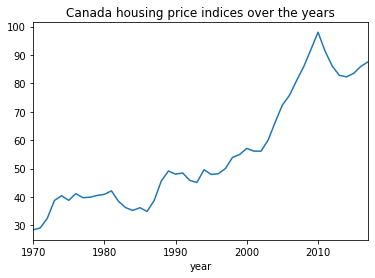

In [55]:
canada_df = df[df['country'] == 'Canada']

canada_norm_price_by_year = canada_df.set_index('year')['norm_price_index']

ax = canada_norm_price_by_year.plot(title='Canada housing price indices over the years')

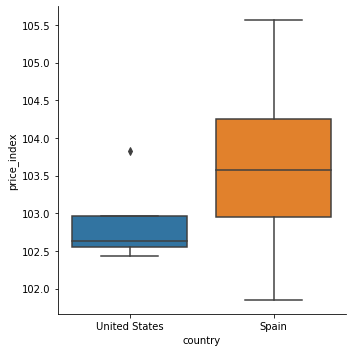

In [56]:
import seaborn

usa_df = df[df['country'] == 'United States']
spain_df = df[df['country'] == 'Spain']
usa_spain = pandas.concat([usa_df, spain_df])
usa_spain_2009 = usa_spain[usa_spain['year'] == 2009]

ax = seaborn.catplot(x='country', y='price_index', data=usa_spain_2009, kind='box')

In [57]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
%matplotlib inline

In [58]:
year_2003 = df[df['year'] == 2003]

category_distribution = year_2003['category'].value_counts(normalize=True)

trace = go.Bar(x=category_distribution.index, y=category_distribution.values,
               marker=dict(color=['#1f77b4', '#ff7f0e', '#2ca02c']))

layout = go.Layout(
    title='Global price category distribution in 2003',
    xaxis=dict(
        title='Category',
    ),
    yaxis=dict(
        title='Ratio',
        range=[0, 1]
    )
)
fig = go.Figure(data=[trace], layout=layout)

In [59]:
iplot(fig)

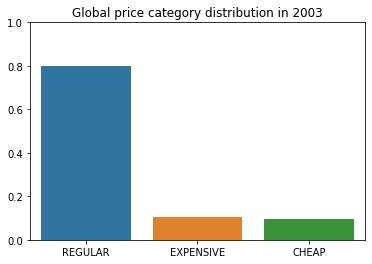

In [60]:
year_2003 = df[df['year'] == 2003]

category_distribution = year_2003['category'].value_counts(normalize=True)

ax = seaborn.barplot(x=category_distribution.index, y=category_distribution.values)

ax = ax.set(title='Global price category distribution in 2003', ylim=(0, 1))

### Performance tips

In [61]:
import numpy

In [62]:
numpy.random.seed(0)
N = 100000
array_A = numpy.random.randint(1, 100, N)
array_B = numpy.random.randint(1, 100, N)
df = pandas.DataFrame({'A': array_A, 'B': array_B})
print(df.shape)
df.head()

(100000, 2)


,A,B
0,45,64
1,48,95
2,65,85
3,68,15
4,68,53


In [63]:
for idx, row in df.iterrows():
    print(idx, row['A'], row['B'])
    if idx >= 5:
        break

0 45 64
1 48 95
2 65 85
3 68 15
4 68 53
5 10 97


In [64]:
def divide(a, b):
    if b == 0:
        return 0.0
    return a / b

In [65]:
from time import time
start = time()

result = [divide(row['A'], row['B']) for _, row in df.iterrows()]

time() - start

6.5170738697052

![](img/pandas_performance_tips.gif)

In [66]:
start = time()
result = df.apply(lambda row: divide(row['A'], row['B']), axis=1)
time() - start

1.5695419311523438

![](img/pandas_performance_tips_2.gif)

In [67]:
start = time()

numpy.vectorize(divide)(df['A'], df['B'])

vectorized_time = time() - start

In [68]:
vectorized_time

0.018812894821166992

In [69]:
print('~ {} ms'.format(int(vectorized_time * 1000)))

~ 18 ms


![](img/pandas_performance_tips_3.gif)

![](img/Slide_10.svg)

![](img/Slide_11.svg)

![](img/Slide_12.svg)